In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
#importing the data
df = pd.read_csv("final.csv")

In [3]:
df.shape

(285339, 1292)

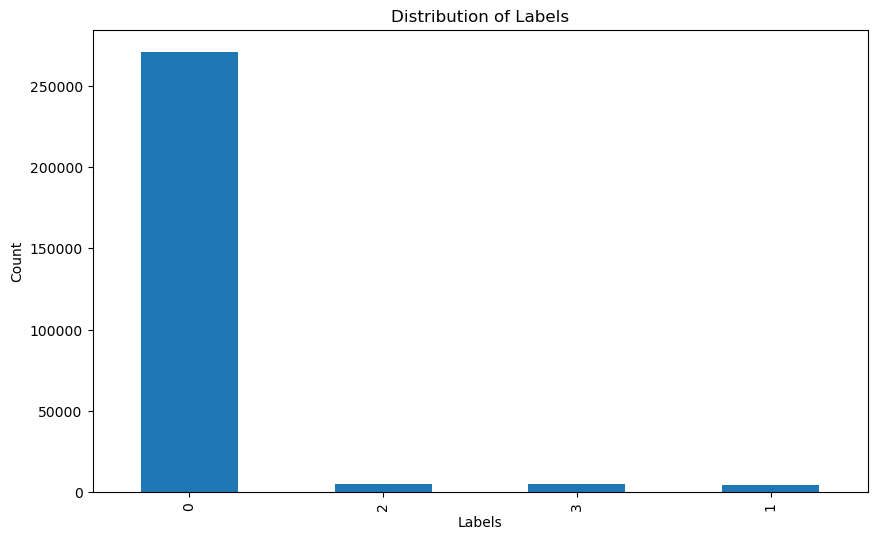

In [4]:
label_counts = df['label'].value_counts()
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()


In [5]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

In [6]:
#Using undersampling method for majority class because of class imbalance
minority_classes = df[df['label'] != 0]
majority_class = df[df['label'] == 0]
majority_class_undersampled = majority_class.sample(n=6000, random_state=42)
undersampled_df = pd.concat([majority_class_undersampled, minority_classes])
X = undersampled_df.drop(columns='label')  
y = undersampled_df['label']               

In [7]:
X.shape, y.shape

((20276, 1291), (20276,))

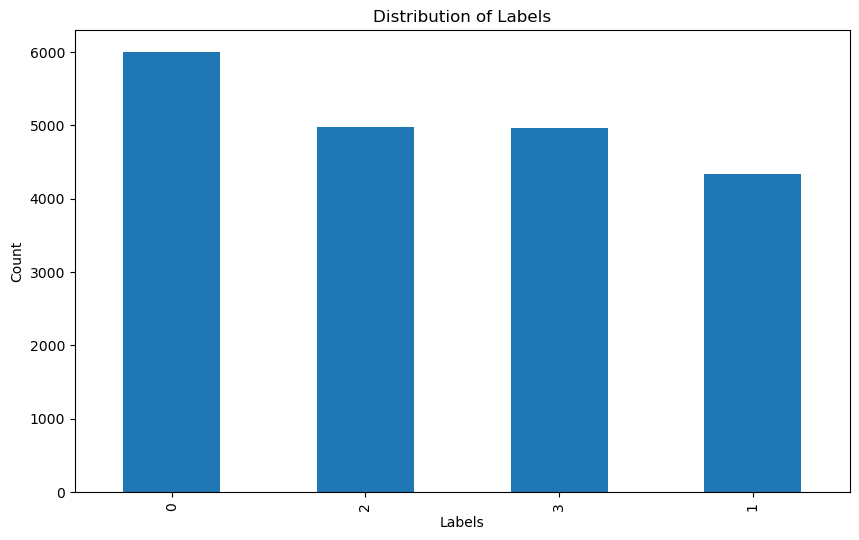

In [8]:
label_counts = y.value_counts()
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()


In [9]:
#splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42
)

In [10]:
#Using KNN for multiclass classificstion
from sklearn.neighbors import KNeighborsClassifier
k = 4
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred1 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test, y_pred1))

[[756  18  70  56]
 [  2 637   5   7]
 [120  14 539  73]
 [ 44   8  74 619]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       900
           1       0.94      0.98      0.96       651
           2       0.78      0.72      0.75       746
           3       0.82      0.83      0.83       745

    accuracy                           0.84      3042
   macro avg       0.84      0.84      0.84      3042
weighted avg       0.84      0.84      0.84      3042



In [11]:
#Using Decision Trees for multiclass classificstion
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train,y_train)
y_pred2 = dtc.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test, y_pred2))

[[743   5  98  54]
 [  0 650   1   0]
 [ 88   4 601  53]
 [ 32   5  26 682]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       900
           1       0.98      1.00      0.99       651
           2       0.83      0.81      0.82       746
           3       0.86      0.92      0.89       745

    accuracy                           0.88      3042
   macro avg       0.88      0.89      0.88      3042
weighted avg       0.88      0.88      0.88      3042



In [12]:
#Using Random Forest for multiclass classificstion
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred3 = rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test, y_pred3))

[[819   0  73   8]
 [  0 651   0   0]
 [ 94   0 641  11]
 [ 34   1  44 666]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       900
           1       1.00      1.00      1.00       651
           2       0.85      0.86      0.85       746
           3       0.97      0.89      0.93       745

    accuracy                           0.91      3042
   macro avg       0.92      0.92      0.92      3042
weighted avg       0.92      0.91      0.91      3042

